In [129]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pow,exp
from sklearn.linear_model import LinearRegression
from pandas.tools.plotting import scatter_matrix
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import f_regression,chi2
import statsmodels.formula.api as smf

In [109]:
df=pd.read_csv('statedata.csv')
df.head()

,Population,Income,Illiteracy,Life.Exp,Murder,HS.Grad,Frost,Area,state.abb,state.area,x,y,state.division,state.name,state.region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [110]:
df.columns=[col.replace('.','_') for col in df.columns]

In [111]:
df.head()

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,state_abb,state_area,x,y,state_division,state_name,state_region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


**Problem 1.1 - Data Exploration**

0 points possible (ungraded)

We begin by exploring the data. Plot all of the states' centers with latitude on the y axis (the "y" variable in our dataset) and longitude on the x axis (the "x" variable in our dataset). The shape of the plot should look like the outline of the United States! Note that Alaska and Hawaii have had their coordinates adjusted to appear just off of the west coast.

In the R command you used to generate this plot, which variable name did you use as the first argument?

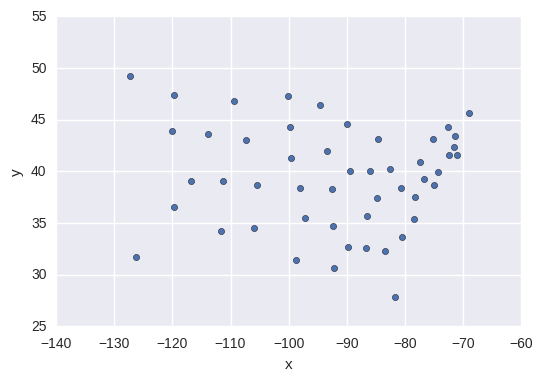

In [112]:
df.plot.scatter(x='x',y='y')

**Problem 1.2 - Data Exploration**

0 points possible (ungraded)

Using the tapply command, determine which region of the US (West,
North Central, South, or Northeast) has the highest average high school
graduation rate of all the states in the region:

In [113]:
df.groupby('state_region')[['HS_Grad']].mean()

,HS_Grad
state_region,
North Central,54.516667
Northeast,53.966667
South,44.343750
West,62.000000


**Problem 1.3 - Data Exploration**

0 points possible (ungraded)

Now, make a boxplot of the murder rate by region (for more information
about creating boxplots in R, type ?boxplot in your console).
Which region has the highest median murder rate?

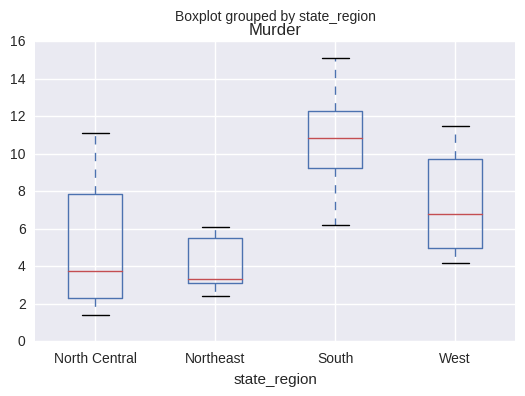

In [114]:
df.boxplot('Murder',by='state_region')

**Problem 1.4 - Data Exploration**

0 points possible (ungraded)

You should see that there is an outlier in the Northeast region of the
boxplot you just generated. Which state does this correspond to? (Hint:
There are many ways to find the answer to this question, but one way is
to use the subset command to only look at the Northeast data.)

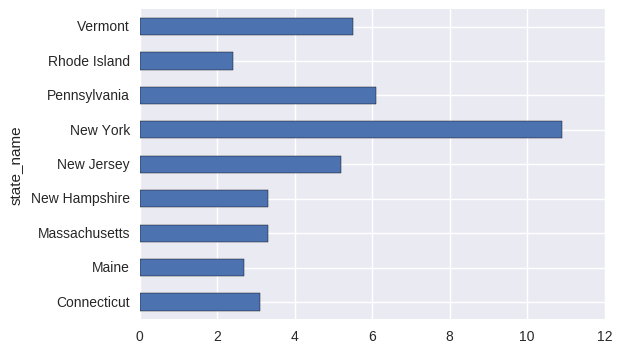

In [115]:
df[df['state_region']=='Northeast'].set_index('state_name')['Murder'].plot(kind='barh')

In [116]:
df.loc[df[df['state_region']=='Northeast']['Murder'].idxmax()]

Population                  18076
Income                       4903
Illiteracy                    1.4
Life_Exp                    70.55
Murder                       10.9
HS_Grad                      52.7
Frost                          82
Area                        47831
state_abb                      NY
state_area                  49576
x                        -75.1449
y                         43.1361
state_division    Middle Atlantic
state_name               New York
state_region            Northeast
Name: 31, dtype: object

**Problem 2.1 - Predicting Life Expectancy - An Initial Model**

0 points possible (ungraded)

We would like to build a model to predict life expectancy by state using
the state statistics we have in our dataset.
Build the model with all potential variables included (Population,
Income, Illiteracy, Murder, HS.Grad, Frost, and Area). Note that you
should use the variable "Area" in your model, NOT the variable
"state.area".
What is the coefficient for "Income" in your linear regression model?

In [117]:
features = [u'Population', u'Income', u'Illiteracy',  u'Murder',
       u'HS_Grad', u'Frost', u'Area', ]
X = df[features].values
y = df['Life_Exp'].values

In [118]:
clf = LinearRegression()
clf.fit(X,y)
clf.score(X,y)
pd.DataFrame(zip(features, clf.coef_))


,0,1
0,Population,5.180036e-05
1,Income,-2.180424e-05
2,Illiteracy,3.382032e-02
3,Murder,-3.011232e-01
4,HS_Grad,4.892948e-02
5,Frost,-5.735001e-03
6,Area,-7.383166e-08


**Problem 2.3 - Predicting Life Expectancy - An Initial Model**

0 points possible (ungraded)

Now plot a graph of life expectancy vs. income using the command:
plot(statedata$Income, statedata$Life.Exp)
Visually observe the plot. What appears to be the relationship?

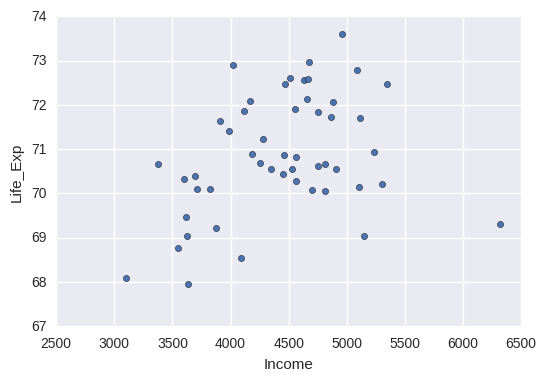

In [119]:
df.plot.scatter('Income','Life_Exp')

**Problem 2.4 - Predicting Life Expectancy - An Initial Model**

0 points possible (ungraded)
The model we built does not display the relationship we saw from the
plot of life expectancy vs. income. Which of the following explanations
seems the most reasonable?


--->Multicollinearity 

Explanation
Although income is an insignificant variable in the model, this does not
mean that there is no association between income and life expectancy.
However, in the presence of all of the other variables, income does not
add statistically significant explanatory power to

**Problem 3.1 - Predicting Life Expectancy - Refining the Model**

and Analyzing Predictions
0 points possible (ungraded)
Recall that we discussed the principle of simplicity: that is, a model with
fewer variables is preferable to a model with many unnnecessary
variables. Experiment with removing independent variables from the
original model. Remember to use the significance of the coefficients to
decide which variables to remove (remove the one with the largest "p-
value" first, or the one with the "t value" closest to zero), and to remove
them one at a time (this is called "backwards variable selection"). This is
important due to multicollinearity issues - removing one insignificant
variable may make another previously insignificant variable become
significant.
You should be able to find a good model with only 4 independent
variables, instead of the original 7. Which variables does this model
contain?

In [120]:
print y

[ 69.05  69.31  70.55  70.66  71.71  72.06  72.48  70.06  70.66  68.54
  73.6   71.87  70.14  70.88  72.56  72.58  70.1   68.76  70.39  70.22
  71.83  70.63  72.96  68.09  70.69  70.56  72.6   69.03  71.23  70.93
  70.32  70.55  69.21  72.78  70.82  71.42  72.13  70.43  71.9   67.96
  72.08  70.11  70.9   72.9   71.64  70.08  71.72  69.48  72.48  70.29]


In [121]:
#simple conversion of step method for R into Python
# source http://stackoverflow.com/questions/22428625/does-statsmodels-or-another-python-package-offer-an-equivalent-to-rs-step-f

import itertools
import numpy as np
import pandas as pd
import statsmodels.api as sm
AICs = {}
for k in range(1,len(features)-2):
    for variables in itertools.combinations(features, k):
        predictors = df[list(variables)]
        predictors['Intercept'] = 1
        res = sm.OLS(df['Life_Exp'], predictors).fit()
        AICs[variables] = 2*(k+1) - 2*res.llf
feature_after_ACI = list(pd.Series(AICs).idxmin())

/home/ramon/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [122]:
feature_after_ACI

[u'Population', u'Murder', u'HS_Grad', u'Frost']

In [124]:
df.head()

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,state_abb,state_area,x,y,state_division,state_name,state_region
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,AL,51609,-86.7509,32.5901,East South Central,Alabama,South
1,365,6315,1.5,69.31,11.3,66.7,152,566432,AK,589757,-127.2500,49.2500,Pacific,Alaska,West
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,AZ,113909,-111.6250,34.2192,Mountain,Arizona,West
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,AR,53104,-92.2992,34.7336,West South Central,Arkansas,South
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,CA,158693,-119.7730,36.5341,Pacific,California,West


In [125]:
formula = 'Life_Exp ~ '+ '+'.join(features)

In [126]:
formula

u'Life_Exp ~ Population+Income+Illiteracy+Murder+HS_Grad+Frost+Area'

In [133]:
model = smf.ols(formula, data=df)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Life_Exp   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     16.74
Date:                Fri, 17 Feb 2017   Prob (F-statistic):           2.53e-10
Time:                        15:11:31   Log-Likelihood:                -51.855
No. Observations:                  50   AIC:                             119.7
Df Residuals:                      42   BIC:                             135.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     70.9432      1.748     40.586      0.000        67.416    74.471
Population   5.18e-05   2.92e-05      1.775      0.083      -7.1e-06     0.000
Income      -2.18e-05      0.000     -0.089      0.929        -0.001     0.000
Illiteracy     0.0338      0.366      0.092      0.927        -0.705     0.773
Murder        -0.3011      0.047     -6.459      0.000        -0.395    -0.207
HS_Grad        0.0489      0.023      2.098      0.042         0.002     0.096
Frost         -0.0057      0.003     -1.825      0.075        -0.012     0.001
Area       -7.383e-08   1.67e-06     -0.044      0.965     -3.44e-06  3.29e-06
==============================================================================
Omnibus:                        2.385   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.303   Jarque-Bera (JB):                1.420
Skew:                          -0.081   Prob(JB):                        0.492
Kurtosis:                       2.190   Cond. No.                     1.85e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.85e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [130]:
pd.DataFrame(results.pvalues.sort_values(ascending=False),columns=['p_value'])

,p_value
Area,9.649075e-01
Income,9.293422e-01
Illiteracy,9.268712e-01
Population,8.318351e-02
Frost,7.518682e-02
HS_Grad,4.197175e-02
Murder,8.679582e-08
Intercept,2.510609e-35


**Problem 3.2 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions**

0 points possible (ungraded)

Removing insignificant variables changes the Multiple R-squared value of

the model. By looking at the summary output for both the initial model
(all independent variables) and the simplified model (only 4 independent
variables) and using what you learned in class, which of the following
correctly explains the change in the Multiple R-squared value?

In [135]:
clf.fit(df[features].values,y)
print clf.score(df[features].values,y)
clf.fit(df[feature_after_ACI].values,y)
print clf.score(df[feature_after_ACI].values,y)

0.736156268909
0.736032771957


**Problem 3.3 - Predicting Life Expectancy - Refining the Model and Analyzing Predictions**

0 points possible (ungraded)

Using the simplified 4 variable model that we created, we'll now take a
look at how our predictions compare to the actual values.
Take a look at the vector of predictions by using the predict function
Which state do we predict to have the lowest life expectancy? (Hint: use
the sort function)

In [136]:
predict = clf.predict(df[feature_after_ACI])

In [149]:
df['predict_1']=predict

In [150]:
df[df.state_name=='Georgia']

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,state_abb,state_area,x,y,state_division,state_name,state_region,predict_1
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,GA,58876,-83.3736,32.3329,South Atlantic,Georgia,South,68.636942


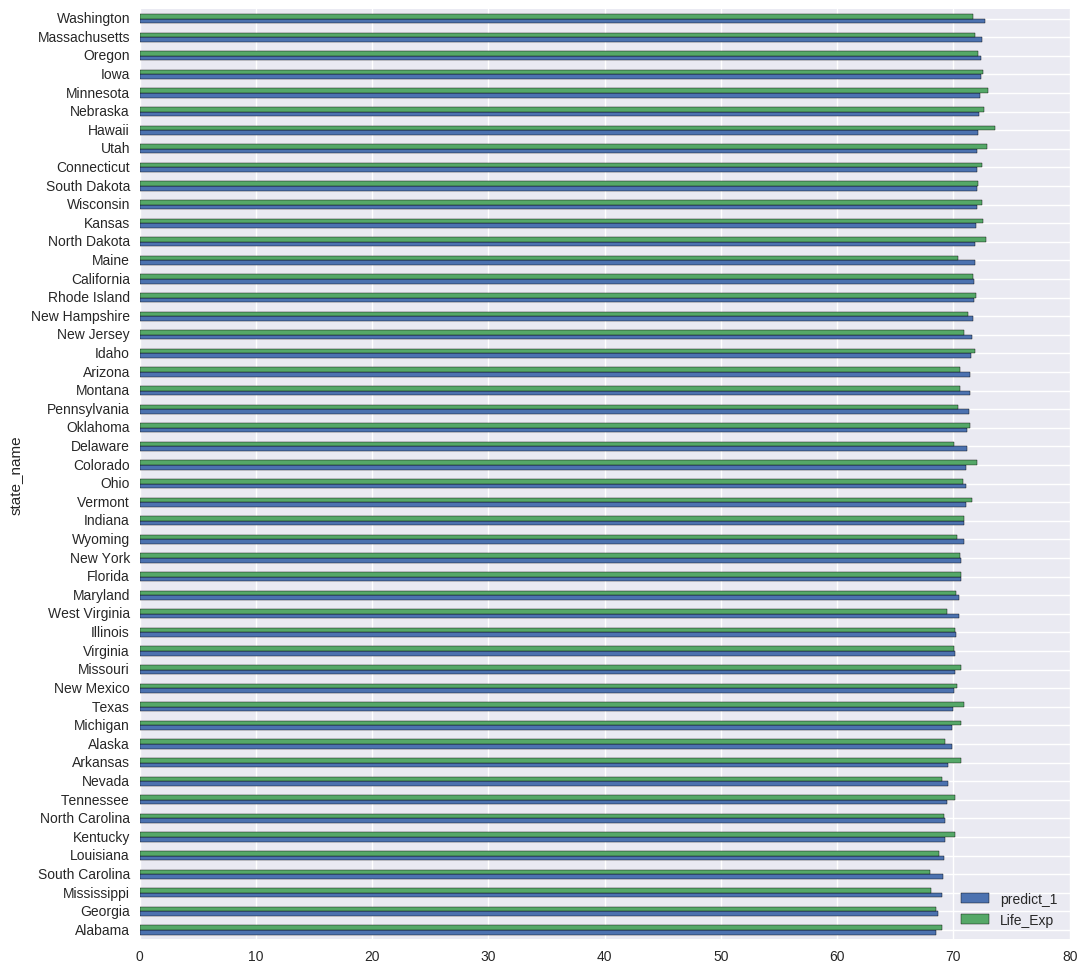

In [151]:
df[['predict_1','Life_Exp','state_name']].set_index('state_name').sort_values(by='predict_1').plot(kind='barh',figsize=(12,12))

In [166]:
df.iloc[df.predict_1.idxmin()].state_name

'Alabama'

In [169]:
df.iloc[df.Life_Exp.idxmin()].state_name

'South Carolina'

**Problem 3.5 - Predicting Life Expectancy - Refining the Model**

and Analyzing Predictions

0 points possible (ungraded)
Take a look at the vector of residuals (the difference between the
predicted and actual values).
For which state do we make the smallest absolute error?

In [176]:
df['residual']=np.abs(df.predict_1-df.Life_Exp)

In [177]:
df.iloc[df.residual.idxmin()].state_name

'Indiana'

In [178]:
df.iloc[df.residual.idxmax()].state_name

'Hawaii'